# PROJECT 1 : BANK MARKETING PREDICTION
# SUBMITTED BY : RAHUL PRADHAN 

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [90]:
bmp = pd.read_csv("Bank-marketing.csv")

In [91]:
bmp.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [92]:
bmp.tail()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,120000,married,secondary,yes,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [93]:
bmp.shape

(45211, 19)

In [94]:
bmp.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Checking for missing values

In [95]:
bmp.isnull().sum() 

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

bmp dataset has no missing values.

### Read in the file and get basic information about the data, including numerical summaries.

In [96]:
bmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


#### So there are 45211 rows and 19 columns in the dataset,in which 8 columns are numerical and 11 are categorical

### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [97]:
bmp["pdays"].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [98]:
print(np.around(bmp["pdays"].mean(), 3))
print(bmp["pdays"].median())
print(bmp["pdays"].min())

40.198
-1.0
-1


#### -> It can be observed that pdays columns mostly contains -ve values
#### ->Pdays means the number of days that passed by after the client was last contacted from previous campaign
#### ->Number of days cannot be negative

### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values? 

In [186]:
bmp1 = bmp.copy()

In [188]:
npdays = bmp1["pdays"]
bmp1["npdays"] = npdays
bmp1["npdays"] = bmp1[bmp1["npdays"] > -1]
print("Mean", np.around(bmp1["npdays"].mean(),2))
print("Median", bmp1["npdays"].median())

Mean 40.95
Median 38.0


####  ->Earlier the mean for the pdays column is 40.198 and after limiting the relevant values of pdays it becomes 40.95, a slight increase can be observed in terms of mean.
#### ->The median comes out to be 38.0 where as it was only -1.0 

### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

<AxesSubplot:xlabel='balance', ylabel='education'>

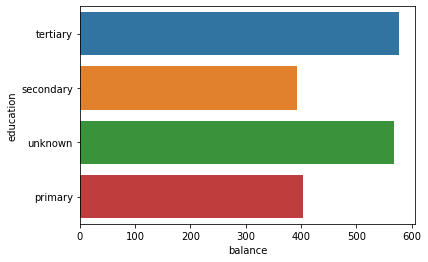

In [101]:
sns.barplot(x = "balance", y = "education", estimator = np.median, data = bmp1, ci = None)

#### Tertiary education has the highest median

### Make a box plot for pdays. Do you see any outliers?

<AxesSubplot:xlabel='npdays'>

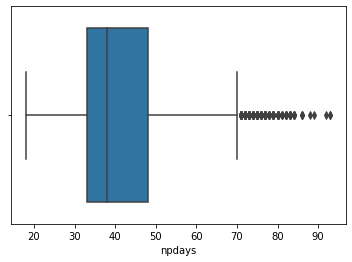

In [102]:
sns.boxplot(x = "npdays", data = bmp1)

#### Yes outliers can be seen.

## The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”.

### First, perform bi-variate analysis to identify the features that are directly associated with the target variable. 

## Bi-Variate Analysis

### Converting the response variable to a convenient form

In [103]:
bmp1.replace({"response" : {"yes" : 1, "no" : 0}}, inplace = True)

In [104]:
bmp1.response.sample(10)

27726    0
20837    0
1242     0
20779    0
15980    1
4311     0
3345     0
40631    1
42903    0
42883    0
Name: response, dtype: int64

### Suitable plots for associations with numerical features and categorical features

In [106]:
num_col = []
cat_col = []
for i in bmp.columns:
    if bmp[i].dtypes == "int64" or bmp[i].dtypes == "float64":
        num_col.append(i)
    else:
        cat_col.append(i)

In [108]:
print("Numerical features are : ", num_col)
print("\n Categorical features are : ", cat_col)

Numerical features are :  ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

 Categorical features are :  ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'response']


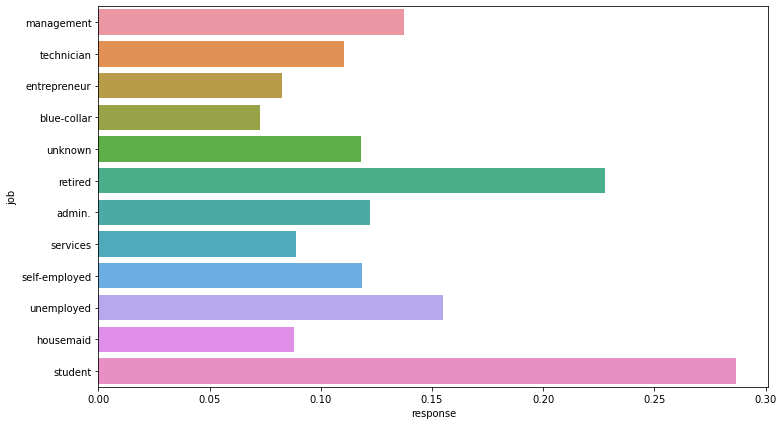

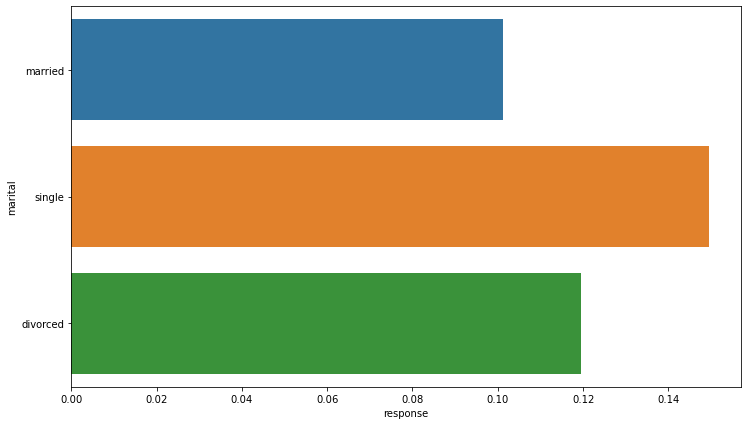

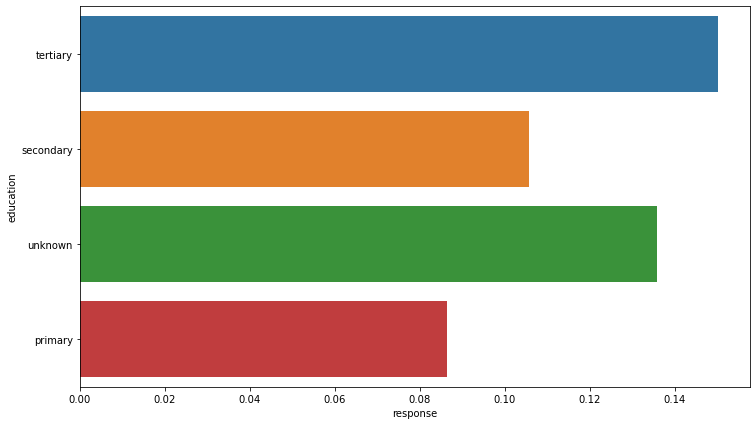

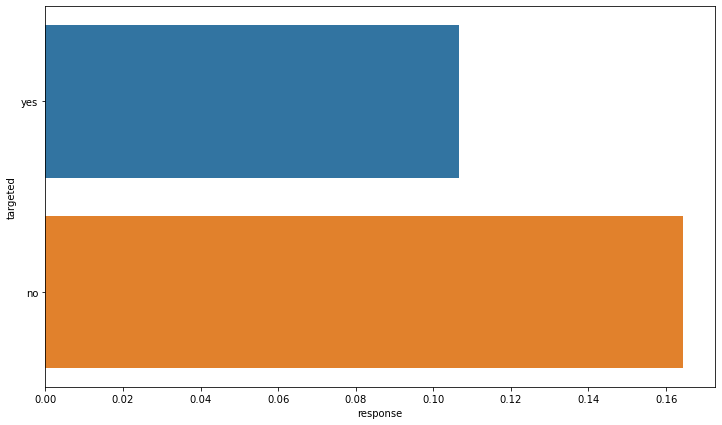

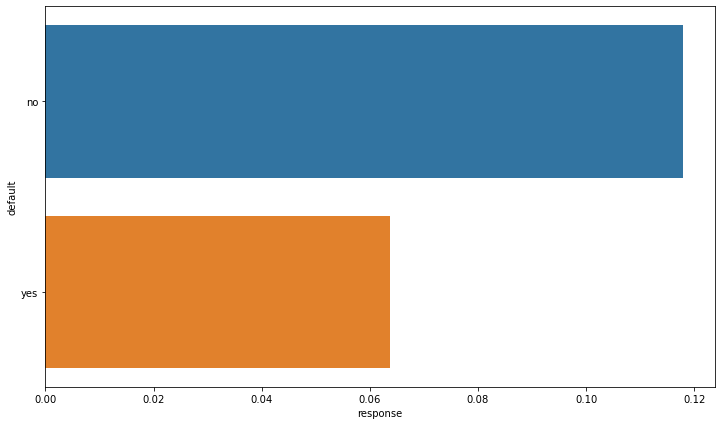

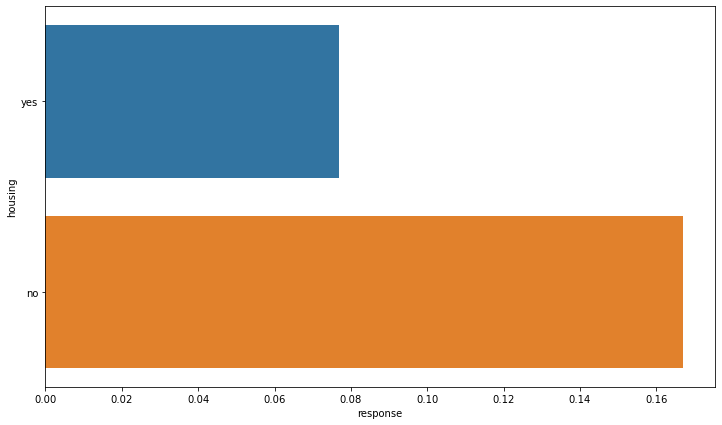

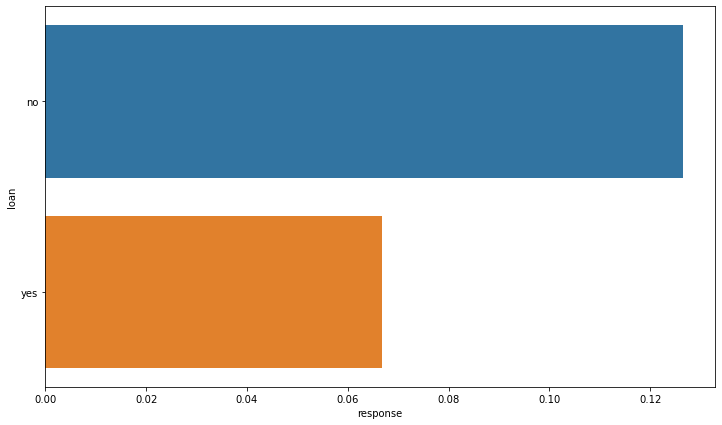

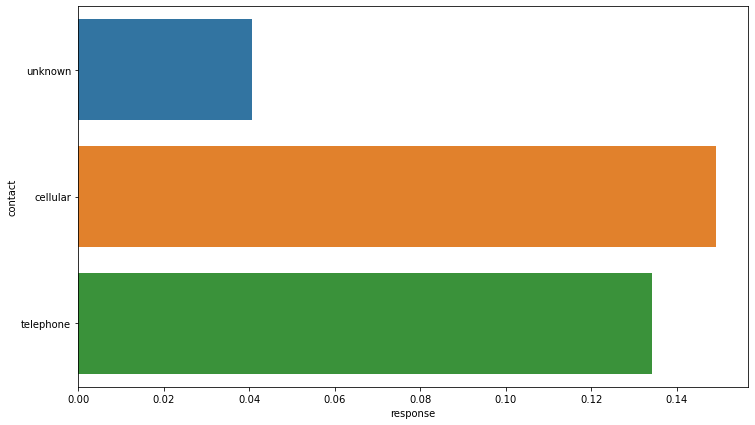

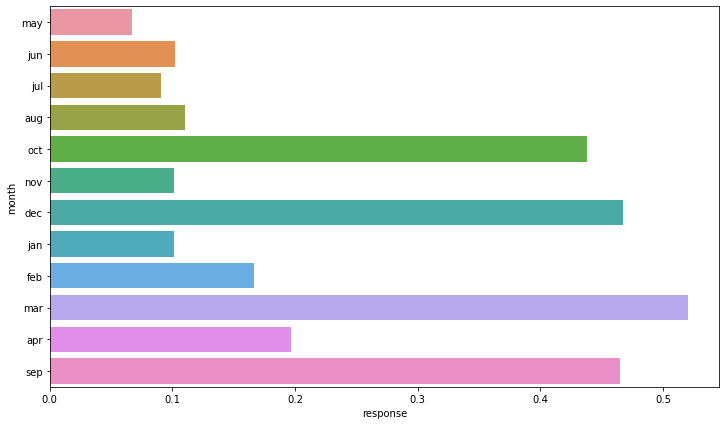

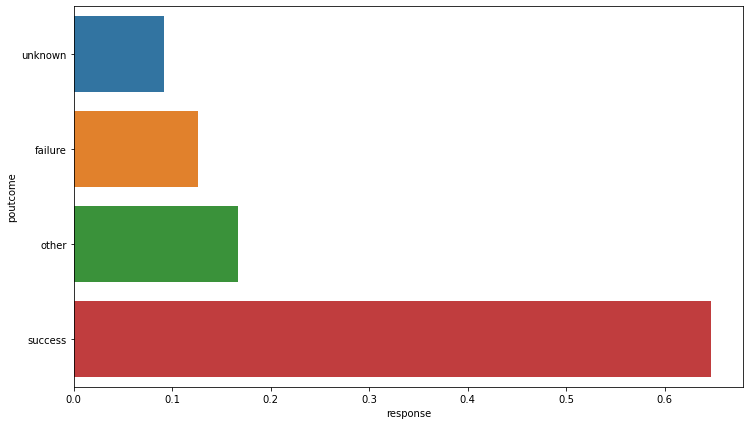

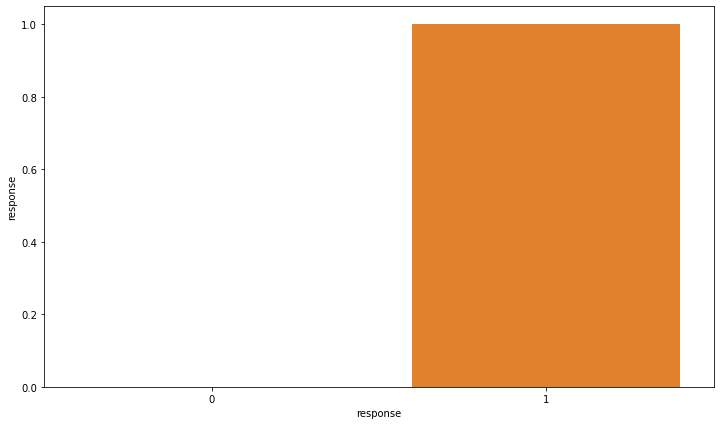

In [109]:
for i in cat_col:
    plt.figure(figsize=(12,7))
    sns.barplot(bmp1["response"], bmp1[i], ci = None) #plotting barplot in respect to response with every features
    plt.show()

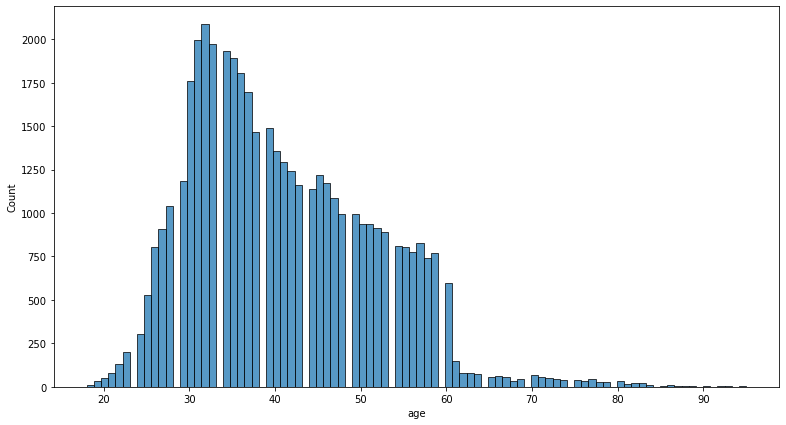

In [110]:
plt.figure(figsize=(13,7))
sns.histplot(x="age", data = bmp)
plt.show()

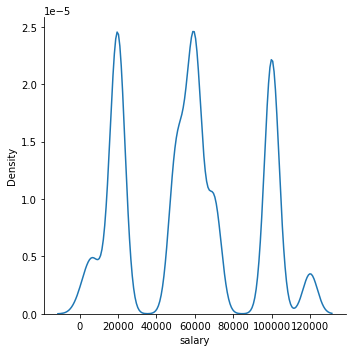

In [111]:
sns.displot(x='salary',data=bmp,kind="kde")

### Checking if housing with loan

<AxesSubplot:xlabel='housing', ylabel='Count'>

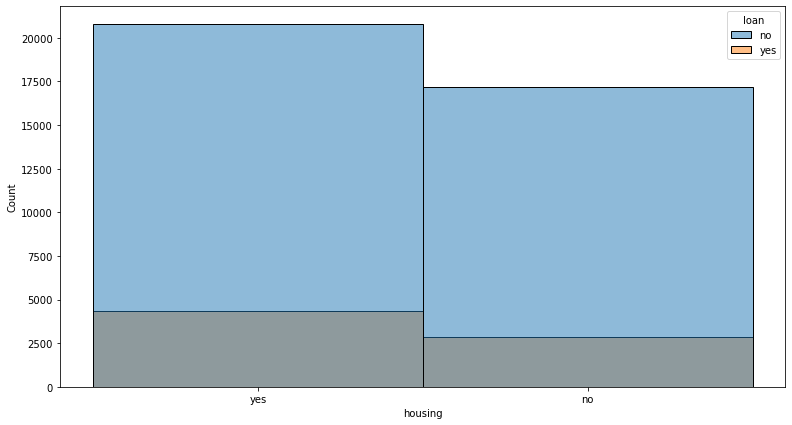

In [112]:
plt.figure(figsize=(13,7))
sns.histplot(x="housing", hue = "loan", data = bmp)

<AxesSubplot:xlabel='contact', ylabel='count'>

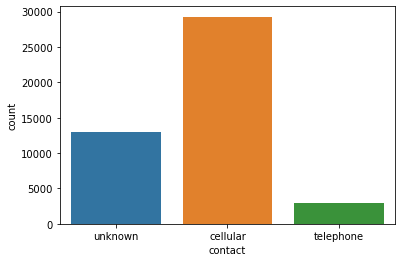

In [113]:
sns.countplot(x="contact", data=bmp)

<AxesSubplot:xlabel='education', ylabel='count'>

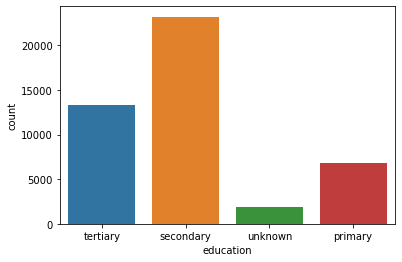

In [114]:
sns.countplot(x="education", data = bmp)

<AxesSubplot:xlabel='targeted', ylabel='count'>

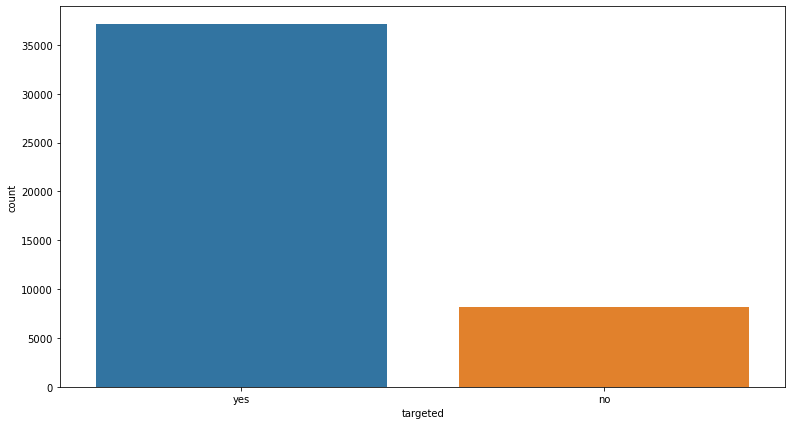

In [115]:
plt.figure(figsize=(13,7))
sns.countplot(x = "targeted", data = bmp)

<AxesSubplot:xlabel='poutcome', ylabel='count'>

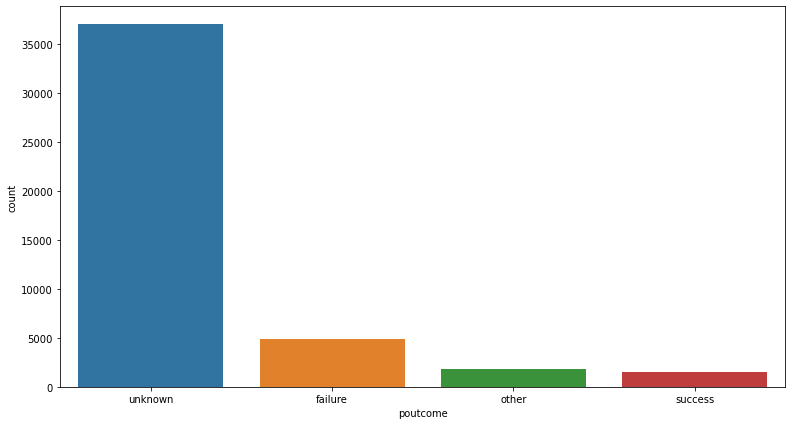

In [116]:
plt.figure(figsize=(13,7))
sns.countplot(x="poutcome", data = bmp)

Text(0.5, 1.0, 'Correlation between numerical features')

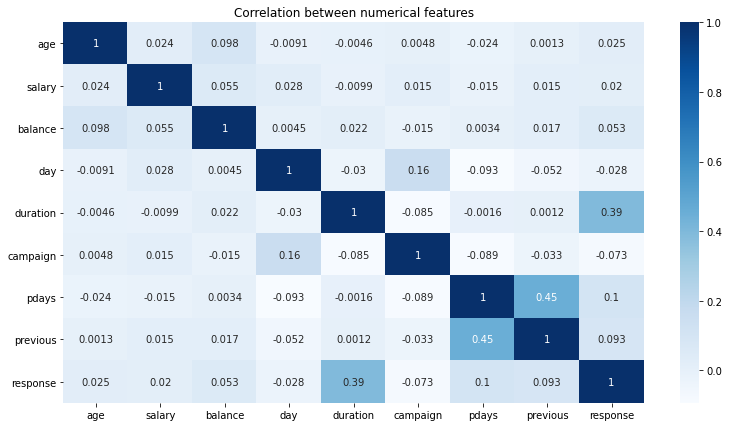

In [117]:
plt.figure(figsize=(13,7))
sns.heatmap(bmp1.corr(),annot = True, cmap = "Blues")
plt.title("Correlation between numerical features")

####  As we see previous column is the highly correlated with our target variable response so it is very useful
### pdays and poutcome are very poorly correlated with our target variable so their impact is negligible 

### Age wise response

<AxesSubplot:xlabel='age', ylabel='Density'>

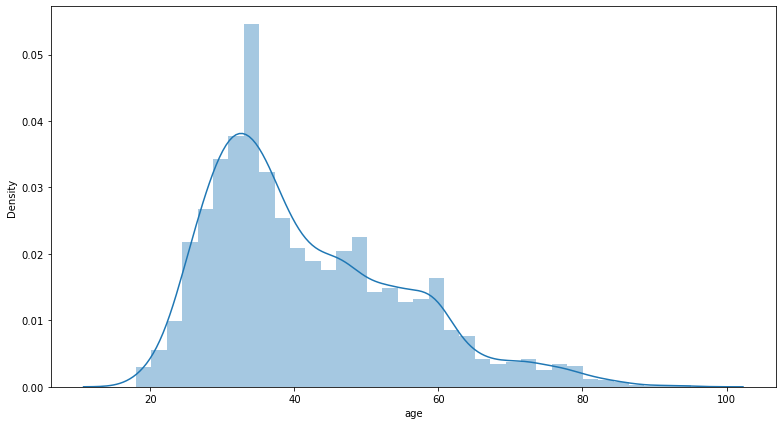

In [118]:
plt.figure(figsize=(13,7))
sns.distplot(bmp1[bmp1['response']==1].age)

<AxesSubplot:xlabel='age', ylabel='Density'>

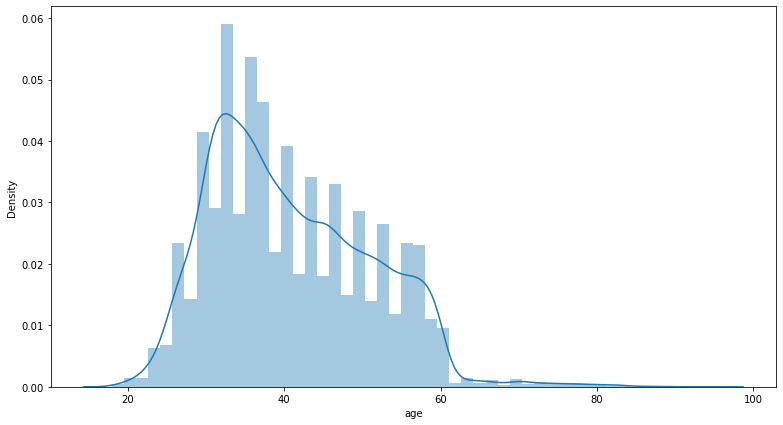

In [119]:
plt.figure(figsize=(13,7))
sns.distplot(bmp1[bmp1["response"]==0].age)

### Job wise salary

In [120]:
bmp1["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [121]:
unknown = bmp1.loc[bmp1["job"] == "unknown"].index
print(unknown)

Int64Index([    4,   216,   354,   876,  1072,  1292,  2046,  2723,  2841,
             2848,
            ...
            44405, 44544, 44651, 44656, 44681, 44714, 44742, 44970, 45141,
            45186],
           dtype='int64', length=288)


In [122]:
bmp1.drop(unknown,inplace = True)

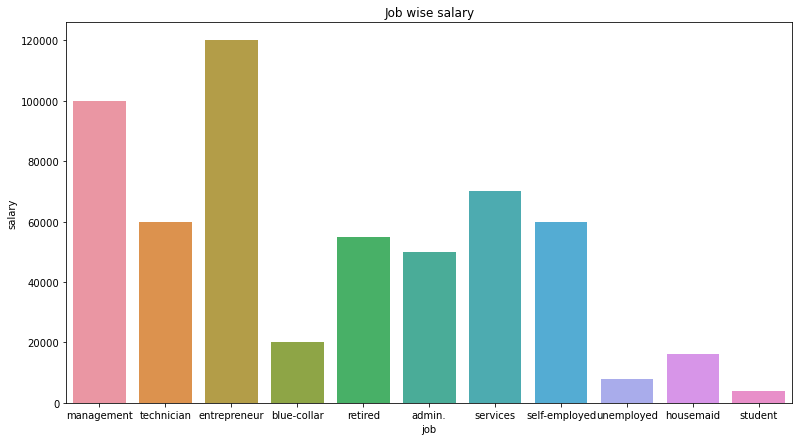

In [123]:
plt.figure(figsize=(13,7))
sns.barplot(x="job", y="salary", data = bmp1)
plt.title("Job wise salary")
plt.show()

#### Entrepreneurs has the highest amount.

### Are the features about the previous campaign data useful?

#### Since, there is no such good correlation between the features. So the features about previous campaign data are more or less useful.

### Are pdays and poutcome associated with the target? 

####  Poutcome is the past data output so I don't think it will affect the target. Weak correlation is present between pdays and the target variable.

### If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision

####  Since, days can't be negative therefore dropping the rows where pdays is -1.

In [124]:
bmp1.drop(bmp1[bmp1['pdays']<0].index,inplace=True)

In [125]:
bmp1["pdays"].loc[bmp1["pdays"]<0]

Series([], Name: pdays, dtype: int64)

### Label Encoding of Categorical Variables

In [126]:
from sklearn.preprocessing import LabelEncoder

In [127]:
bmp2 = bmp1[cat_col].apply(LabelEncoder().fit_transform)
bmp2.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,response
24060,0,1,2,1,0,0,0,1,10,0,0
24062,0,2,1,1,0,1,1,1,10,1,1
24064,7,1,1,1,0,1,0,1,10,0,1
24072,4,1,2,1,0,1,0,1,10,1,0
24077,4,1,2,1,0,1,0,1,10,0,1


In [128]:
bmp3 = bmp2.join(bmp1[num_col])
bmp3.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,response,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,0,33,50000,882,21,39,1,151,3
24062,0,2,1,1,0,1,1,1,10,1,1,42,50000,-247,21,519,1,166,1
24064,7,1,1,1,0,1,0,1,10,0,1,33,70000,3444,21,144,1,91,4
24072,4,1,2,1,0,1,0,1,10,1,0,36,100000,2415,22,73,1,86,4
24077,4,1,2,1,0,1,0,1,10,0,1,36,100000,0,23,140,1,143,3


In [129]:
bmp3.shape

(8224, 19)

### Train Test Split

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
x = bmp3.drop("response", axis = 1)

In [132]:
y = bmp3[["response"]]

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

## Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score

In [135]:
model = LogisticRegression(random_state = 0)

In [136]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [137]:
y_pred = model.predict(x_test)

In [138]:
confusion_matrix(y_pred,y_test)

array([[1807,  456],
       [  90,  115]])

### Use RFE to select top n features in an automated fashion (choose n as you see fit)

In [139]:
from sklearn.feature_selection import RFE
rfe = RFE(model, 2)
rfe.fit(x_train, y_train)

RFE(estimator=LogisticRegression(random_state=0), n_features_to_select=2)

In [140]:
rfe.support_

array([False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False])

In [141]:
x_train.columns[rfe.support_]

Index(['housing', 'poutcome'], dtype='object')

In [142]:
col = x_train.columns[rfe.support_]

In [143]:
model.fit(x_train[col],y_train)

LogisticRegression(random_state=0)

In [144]:
y_pred2 = model.predict(x_test[col])

In [145]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      2141
           1       0.40      0.70      0.51       327

    accuracy                           0.82      2468
   macro avg       0.67      0.77      0.70      2468
weighted avg       0.88      0.82      0.84      2468



In [146]:
confusion_matrix(y_pred2,y_test)

array([[1798,  343],
       [  99,  228]])

### Using p values and VIF, get rid of the redundant features

In [147]:
import statsmodels.api as sm

In [148]:
x_train.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
37346,4,2,1,1,0,1,1,0,8,0,44,100000,-228,13,38,1,362,2
34329,1,1,0,1,1,1,0,0,8,1,32,20000,-148,4,326,3,357,15
43794,9,1,1,1,0,0,0,0,8,1,40,60000,2266,26,175,3,89,7
24795,4,1,1,1,0,1,0,0,9,0,48,100000,4415,18,271,1,102,6
45120,9,1,1,1,0,0,0,0,10,1,32,60000,1547,26,289,1,805,4


In [149]:
x_train_sm=sm.add_constant(x_train[col])

In [150]:
x_train_sm.head()

,const,housing,poutcome
37346,1.0,1,0
34329,1.0,1,1
43794,1.0,0,1
24795,1.0,1,0
45120,1.0,0,1


In [151]:
model2 = sm.OLS(y_train, x_train_sm).fit()

In [152]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     816.0
Date:                Fri, 12 Nov 2021   Prob (F-statistic):          1.08e-312
Time:                        20:10:35   Log-Likelihood:                -2457.8
No. Observations:                5756   AIC:                             4922.
Df Residuals:                    5753   BIC:                             4942.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2298      0.010     23.598      0.000       0.211       0.249
housing       -0.1866      0.010    -17.807      0.000      -0.207      -0.166
poutcome       0.1956      0.007     30.076      0.000       0.183       0.208
==============================================================================
Omnibus:                      679.209   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              940.462
Skew:                           0.974   Prob(JB):                    6.04e-205
Kurtosis:                       3.357   Cond. No.                         3.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [154]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,age,11.837791
2,education,6.642055
3,targeted,6.379178
11,salary,5.308942
16,pdays,5.242890
1,marital,4.367109
13,day,4.126791
8,month,3.614213
5,housing,3.100618
0,job,2.884541


In [155]:
F_col = ['education', 'job', 'poutcome', 'marital', 'month','targeted', 'housing', 'salary','day','duration','age']

In [156]:
log = sm.GLM(y_train,(sm.add_constant(x_train[F_col])), family = sm.families.Binomial())

In [157]:
log.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                 5756
Model:                            GLM   Df Residuals:                     5744
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2181.8
Date:                Fri, 12 Nov 2021   Deviance:                       4363.6
Time:                        20:10:46   Pearson chi2:                 6.03e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5202      0.327    -10.760      0.000      -4.161      -2.879
education      0.1870      0.074      2.517      0.012       0.041       0.333
job            0.0230      0.012      1.876      0.061      -0.001       0.047
poutcome       1.0999      0.046     23.802      0.000       1.009       1.190
marital        0.1632      0.072      2.257      0.024       0.021       0.305
month          0.0088      0.011      0.804      0.422      -0.013       0.030
targeted      -0.1418      0.122     -1.167      0.243      -0.380       0.096
housing       -1.1629      0.081    -14.387      0.000      -1.321      -1.004
salary      8.863e-07   1.31e-06      0.676      0.499   -1.68e-06    3.46e-06
day            0.0084      0.005      1.808      0.071      -0.001       0.018
duration       0.0036      0.000     21.244      0.000       0.003       0.004
age            0.0080      0.004      2.220      0.026       0.001       0.015
==============================================================================
"""

In [158]:
model.fit(x_train[F_col],y_train)

LogisticRegression(random_state=0)

In [159]:
model.classes_

array([0, 1])

In [160]:
model.coef_

array([[ 1.00769168e-02,  2.93524726e-02,  4.49153584e-01,
        -1.10895273e-01, -1.31148112e-01, -1.21938076e-01,
        -3.06681410e-01, -1.16802793e-05,  3.85693732e-03,
         1.74106319e-03, -3.09265787e-03]])

In [161]:
predf = model.predict(x_test[F_col])

In [162]:
def LR_matric():    
    print('Report:\n',classification_report(y_test,predf ))
    print('confusion Matrix:\n',confusion_matrix(predf,y_test))
    print()
    print('kfold cross validation:\n',cross_val_score(model, x, y, cv=5))

In [163]:
LR_matric()

Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      1897
           1       0.56      0.22      0.32       571

    accuracy                           0.78      2468
   macro avg       0.68      0.59      0.59      2468
weighted avg       0.75      0.78      0.74      2468

confusion Matrix:
 [[1797  443]
 [ 100  128]]

kfold cross validation:
 [0.77386018 0.7343465  0.7781155  0.77264438 0.72323601]


##  Random Forest

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [165]:
RFC = RandomForestClassifier(max_depth=5, random_state = 0, max_leaf_nodes= 50)

In [166]:
RFC

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=0)

In [167]:
RFC.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=0)

In [168]:
cv1_score= cross_val_score(RFC,x_train,y_train, cv=5)
np.mean(cv1_score)

0.8412093348778841

In [169]:
Y_pred_= RFC.predict(x_test)

In [170]:
print(classification_report(y_test, Y_pred_))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1897
           1       0.79      0.42      0.55       571

    accuracy                           0.84      2468
   macro avg       0.82      0.69      0.72      2468
weighted avg       0.83      0.84      0.82      2468



In [171]:
f1_score(y_test,Y_pred_)

0.5469107551487415

In [172]:
confusion_matrix(y_test,Y_pred_)

array([[1833,   64],
       [ 332,  239]])

In [173]:
roc_auc_score(y_test,Y_pred_)

0.6924132213551307

## RFE

In [174]:
rfe1 = RFE(RFC, 5)
rfe1.fit(x_train,y_train)

RFE(estimator=RandomForestClassifier(max_depth=5, max_leaf_nodes=50,
                                     random_state=0),
    n_features_to_select=5)

In [175]:
rfe1.support_

array([False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False,  True, False,  True, False])

In [176]:
x_train.columns[rfe1.support_]

Index(['housing', 'month', 'poutcome', 'duration', 'pdays'], dtype='object')

In [177]:
cols = x_train.columns[rfe1.support_]

In [178]:
RFC.fit(x_train[cols],y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=0)

In [179]:
y_pred3 = RFC.predict(x_test[cols])

In [180]:
f1_score(y_pred3,y_test)

0.5987525987525987

In [181]:
confusion_matrix(y_pred3,y_test)

array([[1794,  283],
       [ 103,  288]])

In [182]:
print(classification_report(y_pred3, y_test))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      2077
           1       0.50      0.74      0.60       391

    accuracy                           0.84      2468
   macro avg       0.73      0.80      0.75      2468
weighted avg       0.88      0.84      0.85      2468



In [183]:
roc_auc_score(y_test,y_pred3)

0.7250410132322489

####  The RF model performed better than LR.

####  Housing, Month, Pdays, Poutcome, Duration are important features as per RF algorithm.

####  Targeted, Housing, Loan, Contact, Poutcome are important features according to LR.